In [2]:
%matplotlib inline
from IPython.display import YouTubeVideo
YouTubeVideo('3yaIOsjiSm0')

The main advantage of using Python for Data Science is the fast REPL.
Make a script that will execute the housekeeping tasks like creating input and output folders, getting json data, etc.
This script will take data, manipulate it, pipe it to python scripts, etc.

Combine Pig with python for scalability.

```python

def main():
    for line in sys.stdin:
        # do something
if __name__ == "__main__":
    main()
    
#Dictionary comprehension
new_dict = {"new_"+k : val  for k, val in old_dict.items()}

```

In [8]:
dict_from_tuples = dict([ ("a",1),("b",2) ])
tuples_again = dict_from_tuples.items()
print(tuples_again)

dict_items([('b', 2), ('a', 1)])


In [20]:
# zip to combine lists
# For making a dictionary of days of week indexed by numbers
print(range(7))
days = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]
print(days)
day_of_week = dict(zip(range(7), days))
print(day_of_week)

range(0, 7)
['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
{0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thu', 4: 'Fri', 5: 'Sat', 6: 'Sun'}


In [23]:
#dealing with list indexes
data = [["Bob",50],["Jane",35]]

#bad way
for line in data:
    name = line[0]
    age = line[1]
    #doprocessing(name,age)
# difficult to maintain and change if there are a lot of columns

#good way
cols = ["name", "age"]

for line in data:
    record = dict(zip(cols,line))
    print(record["name"])
    #doprocessing(record)

#good way 2
employees = [dict(zip(cols,record)) for record in data]
print([emp["name"] for emp in employees])

Bob
Jane
['Bob', 'Jane']


In [28]:
#String manipulation, split, join
date_string = "2015-04-15"
year,month,day = [int(x) for x in date_string.split("-")]
print(year,month,day)

#combine list of strings
s1 = "This is a string"
s2 = "and so is this"
print("\t".join([s1,s2]))  # Use tab character to join this list of strings

2015 4 15
This is a string	and so is this


In [34]:
# Templating
hw_template = "Hello %s!"
print(hw_template % "world")

# Template method 2
emp_template = "Emp name : %(name)s\t\tEmp age : %(age)i years old"
print(emp_template % {"name":"Jane", "age":35})

# Template method 3
month = "Jan"
url_template = 'http://whatever.com/{month}'
print(url_template.format(month=month))

Hello world!
Emp name : Jane		Emp age : 35 years old
http://whatever.com/Jan


In [61]:
# String functions
print("hello".endswith("lo"))
print("waterbottle".startswith("wa"))
print("world   \t\n".strip() == "world")
print("world !".strip() == "world !")  # will not strip white space inside
print("world".rjust(7,"-"))
"world".replace("or","i")
print("1234".isdigit())      # only checks if the contents are numbers

True
True
True
True
--world
True


Use iterators rather than lists.
Lists are stored in memory
Iterators are processed one at a time

```python
#Example
for line in sys.stdin:


ys = [f(x) for x in xs] #List
ys = (f(x) for x in xs) #Iterator
```


In [6]:
xs = [34,45,62,46,24]

#Iterator
def apply_f(xs):
    for x in xs:
        yield f(x)
ys = apply_f(xs)


**Use itertools for efficient processing, that do not have to load the entire data in the memory**

In [16]:
#Use itertools for iterators
try:
    from itertools import izip
except ImportError:
    izip = zip
# list1 = [1,2,3,4,5]
list1 = list(range(1,6))
list2 = ["a","b","c","d"] # No e, so only the first 4 items can be paired
pairs = izip(list1, list2)
print(pairs)  # Contents not in ram
for p in pairs:
    print(p)

# permutations and combinations
# it.permutations
triples = it.combinations(list1,3)
for t in triples:
    print(t)

(1, 'a')
(2, 'b')
(3, 'c')
(4, 'd')
(1, 2, 3)
(1, 2, 4)
(1, 2, 5)
(1, 3, 4)
(1, 3, 5)
(1, 4, 5)
(2, 3, 4)
(2, 3, 5)
(2, 4, 5)
(3, 4, 5)


Itertools groupby function
http://stackoverflow.com/questions/773/how-do-i-use-pythons-itertools-groupby/7286#7286

In [37]:
from itertools import groupby
# groupby iterator can group a SORTED list
things = [("animal", "bear"), ("animal", "duck"), ("plant", "cactus"), ("vehicle", "speed boat"), ("vehicle", "school bus")]
groups = groupby(things, key=lambda x: x[0])

# Method 1
for group in groups:
    print(group[0]) # First element, group name, of the tuple. Second element is an iterator
    for item in group[1]:
        print(item[1])  # First element is group name itself. Structure is same as the original tuple
    print()

#Method 2
groups = groupby(things, key=lambda x: x[0])  # Iterator has expired and has to be reinitiated
for key,group in groups:
    print(key)
    for item in group:
        print(item[1],"is in",item[0])
    print()

    
# Method 3
for key, group in groupby(things, lambda x: x[0]):
    listOfThings = " and ".join([thing[1] for thing in group])
    print(key + "s:  " + listOfThings + ".")
    

animal
bear
duck

plant
cactus

vehicle
speed boat
school bus

animal
bear is in animal
duck is in animal

plant
cactus is in plant

vehicle
speed boat is in vehicle
school bus is in vehicle

animals:  bear and duck.
plants:  cactus.
vehicles:  speed boat and school bus.


**Use Sets**
```python
unique_categories = set([ x["category"] for x in records ])

#frozensets are immutable
cities = frozenset(["Frankfurt", "Basel","Freiburg"])
cities.add("Delhi")  #Error
```

### Libraries
Scikit-Learn : ML  
Pandas : Data frames (like SQL Tables, R Dataframes or Pig relations)  
SciPy: Numerical Computing  
Matplotlib : Graphics  
NumPy : Very fast arrays

In [49]:
from numpy.random import randn
import pandas as pd
print(randn(3,2))
# pd.read_csv("foo.csv)    Pandas from csv
print(pd.DataFrame(randn(9,3),columns=["a","b","c"])) # Pandas from nparray
print(pd.DataFrame({"a":[1,2,3],"b":[4,5,6]}))        # Pandas from dictionary

[[-0.89379573  0.27205826]
 [ 0.51273182 -0.99370119]
 [-0.0612798   0.24743203]]
          a         b         c
0  0.144411 -0.015677  0.294696
1  0.620431  0.671738 -1.702840
2  1.729871 -1.905536  0.221650
3  0.080635  0.000445 -0.485578
4 -2.061589 -1.126179 -1.372862
5 -0.480609 -0.583985 -0.367843
6  1.017049 -0.151002  1.499512
7  0.460237  0.381386  0.638932
8 -0.922635  0.808608  0.631011
   a  b
0  1  4
1  2  5
2  3  6


In [62]:
df = pd.DataFrame(randn(3,2),columns=["a","b"])
print(df)
df["a"]=df["a"]+1    # Add one to each element in column a
print(df)
df["c"] = [2,3,4]    # New column
print(df[["a","c"]])   # print columns a and c
print(df["c"]>2)     # True for rows that satisfy the condition
print(df[df["c"]>2]) # Print those rows
print(df.index)
df.loc[[0,2]]        # print rows with index 0 and 2. Can be strings if index is on a string column

          a         b
0 -1.840209  0.021507
1 -0.230954  0.410473
2 -0.104605 -0.286782
          a         b
0 -0.840209  0.021507
1  0.769046  0.410473
2  0.895395 -0.286782
          a  c
0 -0.840209  2
1  0.769046  3
2  0.895395  4
0    False
1     True
2     True
Name: c, dtype: bool
          a         b  c
1  0.769046  0.410473  3
2  0.895395 -0.286782  4
Int64Index([0, 1, 2], dtype='int64')


,a,b,c
0,-0.840209,0.021507,2
2,0.895395,-0.286782,4


In [70]:
df1 = pd.DataFrame(randn(5,3))
df2 = pd.DataFrame(randn(3,3))
print(pd.concat([df1,df2],axis=0)) # default axis is 0. that is, rows of df2 will be appended to df1
print(pd.concat([df1,df2],axis=1)) # columns appended to the right. NaN for missing values
print(pd.concat([df1,df2],axis=1,join="inner")) # inner join. rows/columns with missing values ignored
# for proper SQL inner join, use pandas.merge

          0         1         2
0 -0.878005  0.258699  0.714875
1 -0.240208 -0.355586  1.005578
2  0.885706  1.389523 -1.121534
3  1.593452  2.218284  0.291473
4 -0.710076  0.595565  0.300915
0 -1.047837 -0.140768 -0.587296
1  0.295423  0.340218  0.318606
2  0.802131  0.622089  0.900265
          0         1         2         0         1         2
0 -0.878005  0.258699  0.714875 -1.047837 -0.140768 -0.587296
1 -0.240208 -0.355586  1.005578  0.295423  0.340218  0.318606
2  0.885706  1.389523 -1.121534  0.802131  0.622089  0.900265
3  1.593452  2.218284  0.291473       NaN       NaN       NaN
4 -0.710076  0.595565  0.300915       NaN       NaN       NaN
          0         1         2         0         1         2
0 -0.878005  0.258699  0.714875 -1.047837 -0.140768 -0.587296
1 -0.240208 -0.355586  1.005578  0.295423  0.340218  0.318606
2  0.885706  1.389523 -1.121534  0.802131  0.622089  0.900265


          0         1         2
0 -1.246225 -0.564200 -0.117057
1 -0.064810 -0.825393  1.029620
2  1.021766 -0.024018 -0.587133
3 -0.072821 -0.855495  1.411857
4  0.880054  1.958117  1.322439


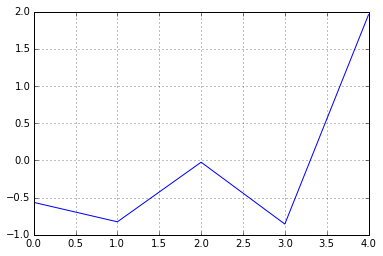

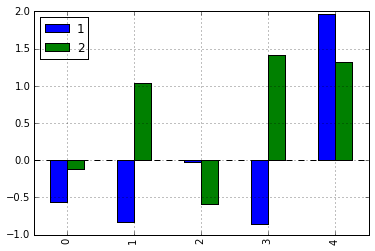

In [5]:
%matplotlib inline
import pandas as pd
from numpy.random import randn
import matplotlib.pyplot as pp
df1 = pd.DataFrame(randn(5,3))
print(df1)
df1[1].plot()
pp.show()
df1[[1,2]].plot(kind="bar")
pp.show()
# pp.savefig("figname.jpg")


In [20]:
from sklearn import datasets
from sklearn import svm

# Builtin dataset of hand-written digits
d = datasets.load_digits()

classifier = svm.SVC(gamma = 0.001, C = 100)
classifier.fit(d.data[:-1], d.target[:-1])

prediction = classifier.predict(d.data[-1])
print(d.target[-1]) # Actual class - last target
print(prediction)

8
[8]


Scikit-learn has a lot more classifiers. Check it out.

###Hadoop
scalability.
Map reduce paradigm

###Pig
Script language
Converts into Map Reduce code

Python can be used to take input from stdin and write output to stdout. Then, use pig to integrate python code in the process. Another method is to use Jython to compile python code to run on Jvm